<a href="https://colab.research.google.com/github/niranjan-sa/DataScience/blob/master/Home_Work_3_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> Homework 3 DSF

In [0]:
import operator

In [10]:
#Importing dependancies.
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import os
import gc
#print (os.listdir('../input/ieee-fraud-detection/.'))
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
## Colab code
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [0]:
## Colab code
#os.listdir('My Drive/Colab Notebooks/.')

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
## Credits J. Howard, fastai (for this method)
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [14]:
train = pd.read_csv('My Drive/Colab Notebooks/train.csv')
test = pd.read_csv('My Drive/Colab Notebooks/test.csv')
print (train.shape)
print (test.shape)

(1460, 81)
(1459, 80)


In [0]:
test.set_index('Id', inplace=True)
train.set_index('Id', inplace=True)

#### See that
* Status of the null values. 
* Take a look at the object types and decide imputation strategy.
* Take a look at the variance of the variables.
* Plot the frequency of variables with unique values < 10

In [16]:
display_all (train.isna().sum()*100/train.shape[0])

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
T

In [17]:
display_all (train.dtypes)

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


In [18]:
display_all(train.var())

MSSubClass       1.789338e+03
LotFrontage      5.897492e+02
LotArea          9.962565e+07
OverallQual      1.912679e+00
OverallCond      1.238322e+00
YearBuilt        9.122154e+02
YearRemodAdd     4.262328e+02
MasVnrArea       3.278497e+04
BsmtFinSF1       2.080255e+05
BsmtFinSF2       2.602391e+04
BsmtUnfSF        1.952464e+05
TotalBsmtSF      1.924624e+05
1stFlrSF         1.494501e+05
2ndFlrSF         1.905571e+05
LowQualFinSF     2.364204e+03
GrLivArea        2.761296e+05
BsmtFullBath     2.692682e-01
BsmtHalfBath     5.700283e-02
FullBath         3.035082e-01
HalfBath         2.528937e-01
BedroomAbvGr     6.654938e-01
KitchenAbvGr     4.854892e-02
TotRmsAbvGrd     2.641903e+00
Fireplaces       4.155947e-01
GarageYrBlt      6.095825e+02
GarageCars       5.584797e-01
GarageArea       4.571251e+04
WoodDeckSF       1.570981e+04
OpenPorchSF      4.389861e+03
EnclosedPorch    3.735550e+03
3SsnPorch        8.595059e+02
ScreenPorch      3.108889e+03
PoolArea         1.614216e+03
MiscVal   

In [19]:
print (train.var().idxmax(), train.var().max())
print (train.var().idxmin(), train.var().min())

SalePrice 6311111264.297451
KitchenAbvGr 0.048548921667120055


1. > The above analysis shows that min variance in values was found for `KitchenAbvGr` variable.

In [0]:
def frequency_plots(data, include_na=False):
    columns = data.columns
    if include_na:
        #data = data.fillna(-2000)
        for col in columns:
            print ('Processing '+col)
            fig, ax = plt.subplots()
            fig.set_size_inches(8, 7)
            plt.ylabel("Count in K [Nulls Included]")
            data = data.fillna('Null')
            #data[col].value_counts(normalize=True)[:10].plot(kind='barh')
            g = sns.countplot(x=data[col], ax=ax, order=data[col].value_counts().iloc[:10].index)
            plt.title(col)
            plt.show()
    else:
        for col in columns:
            print ('Processing '+col)
            fig, ax = plt.subplots()
            fig.set_size_inches(8, 7)
            plt.ylabel("Count in K")     
            g = sns.countplot(x=data[col], ax=ax, order=data[col].value_counts().iloc[:10].index)
            plt.title(col)
            plt.show()

In [0]:
#frequency_plots(train.drop(columns=['Id'], axis=1))

Plots including NAs

In [0]:
#frequency_plots(train.drop(columns=['Id'], axis=1), include_na=True)

**Let's get a sneak peak into max and min number of unique categories throughout the data set**

In [23]:
hm = {}
for col in train.columns:
    if train[col].dtype == 'object':
        hm[col] = train[col].unique().shape[0]
        #print (train[col].unique().shape)
print (max(hm.items(), key=operator.itemgetter(1))[0])
print (min(hm.items(), key=operator.itemgetter(1))[0])

print (max(hm.items(), key=operator.itemgetter(1))[1])
print (min(hm.items(), key=operator.itemgetter(1))[1])

Neighborhood
Street
25
2


Looks like we can think on one hot encoding for all the categories later on, because   we seem to have not a huge no of categories in any of a particular columns.  
**Before we jump into more plotting, it seems necessary to fix the issue of null values.**    
Therefore, I define a generic methond to fill the null values and return the resultant data.

In [24]:
display_all(pd.DataFrame({'Null':train.isna().sum()*100/train.shape[0], 'Dtype':train.dtypes.values}))

,Null,Dtype
MSSubClass,0.000000,int64
MSZoning,0.000000,object
LotFrontage,17.739726,float64
LotArea,0.000000,int64
Street,0.000000,object
Alley,93.767123,object
LotShape,0.000000,object
LandContour,0.000000,object
Utilities,0.000000,object
LotConfig,0.000000,object


In [0]:
def treat_null(train, by='avg'):
    temp = train.copy(deep=True)
    for col in temp.columns:
        if temp[col].dtype == 'object':
            temp[col].fillna('missing', inplace=True)
        else:
            if by == 'avg':
                temp[col].fillna(value = temp[col].mean(), inplace=True)
            elif by == 'median':
                temp[col].fillna(value = temp[col].median(), inplace=True)
            elif by == 'mode':
                temp[col].fillna(value = temp[col].mode(), inplace=True)
            elif by == 'ffil':
                temp[col].fillna(method = 'ffill', inplace=True)
    return temp

def treat_null_test(train, test,  by='avg'):
    temp = test.copy(deep=True)
    for col in test.columns:
        if temp[col].dtype == 'object':
            temp[col].fillna('missing', inplace=True)
        else:
            if by == 'avg':
                temp[col].fillna(value = train[col].mean(), inplace=True)
            elif by == 'median':
                temp[col].fillna(value = train[col].median(), inplace=True)
            elif by == 'mode':
                temp[col].fillna(value = train[col].mode(), inplace=True)
            elif by == 'ffil':
                temp[col].fillna(method = 'ffill', inplace=True)
    return temp

In [26]:
ntrain = treat_null(train)
ntest = treat_null_test(train, test)

display_all(pd.DataFrame({'Null':ntrain.isna().sum()*100/ntrain.shape[0], 'Dtype':ntrain.dtypes.values}))

,Null,Dtype
MSSubClass,0.0,int64
MSZoning,0.0,object
LotFrontage,0.0,float64
LotArea,0.0,int64
Street,0.0,object
Alley,0.0,object
LotShape,0.0,object
LandContour,0.0,object
Utilities,0.0,object
LotConfig,0.0,object


In [27]:
ntrain.shape, ntest.shape

((1460, 80), (1459, 79))

### Question 1

As a starter, I'm plotting all the 38 numeric variables in the co-relation plot. But then I'll narrow this number down to some interesting variables!!

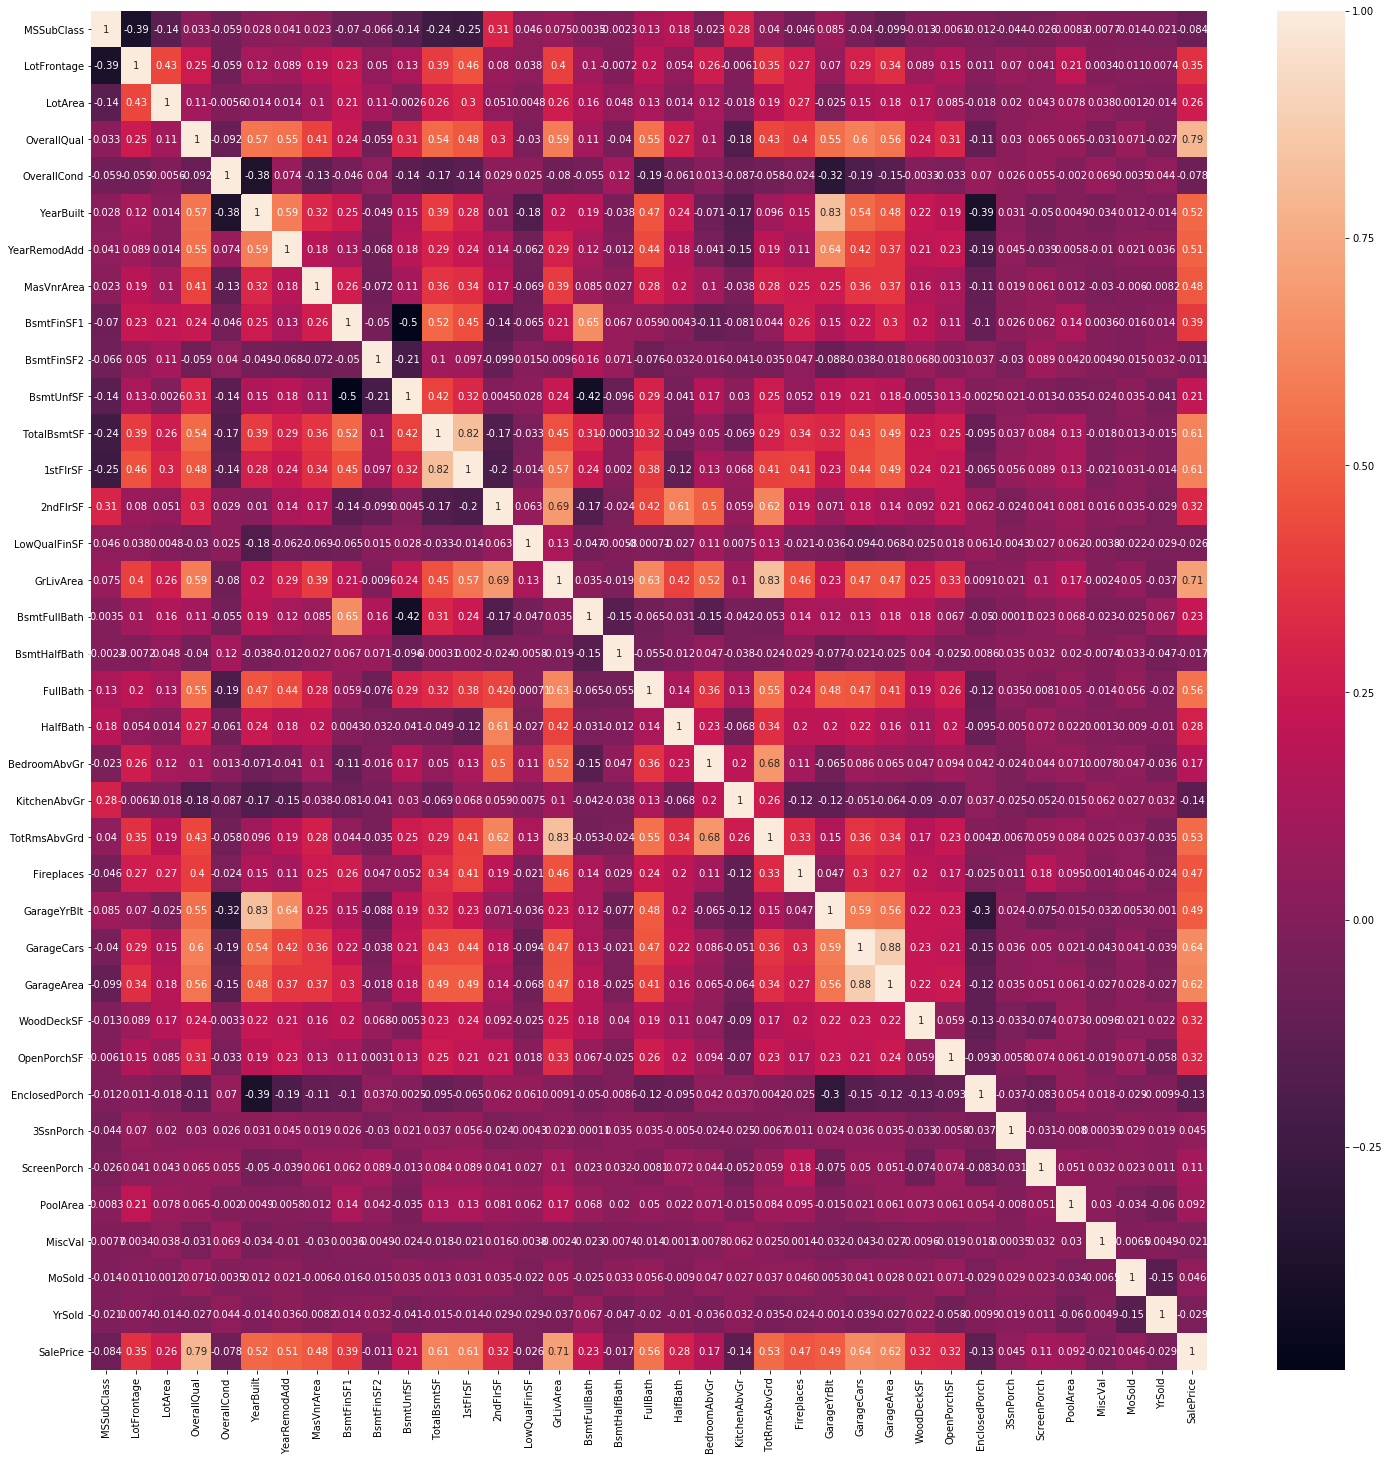

In [28]:
# cor-relation note that this includes only the numeric features
corr = train.corr()
colnames = corr.index
plt.figure(figsize=(25, 25))
g = sns.heatmap(data=corr, annot=True)

**Observations**
* I can see that the variables like `GrLivArea`, `OpenPorchSF`, `GarageArea` etc. have a strong positive co-relation with the `SalePrice`.
* On the contrary, there are also no variables that exibit a strong negative co-relation with the `SalePrice`
* Some variables, have a strong positive / negative co-relation with other variables (not the target variable). Eg. `GarageYrBuilt` and `YrBuilt`. This information can be used for dimentionality reduction, as having both the variables might not add more impact!

Extending above code to get variables with > `.5` and < -`.4` correlation

In [29]:
k = corr.unstack()
so = k.sort_values()
mask = ((so<-0.4) | (so > 0.5) & (so != 1))
colnames = so[mask].index
cols = []
for k in colnames:
    cols.append(k[0])
    cols.append(k[1])
cols = set(cols)
print (len(cols))

18


**So we have 18 highly co-related features!!, Let's plot a new heat map for them!!**

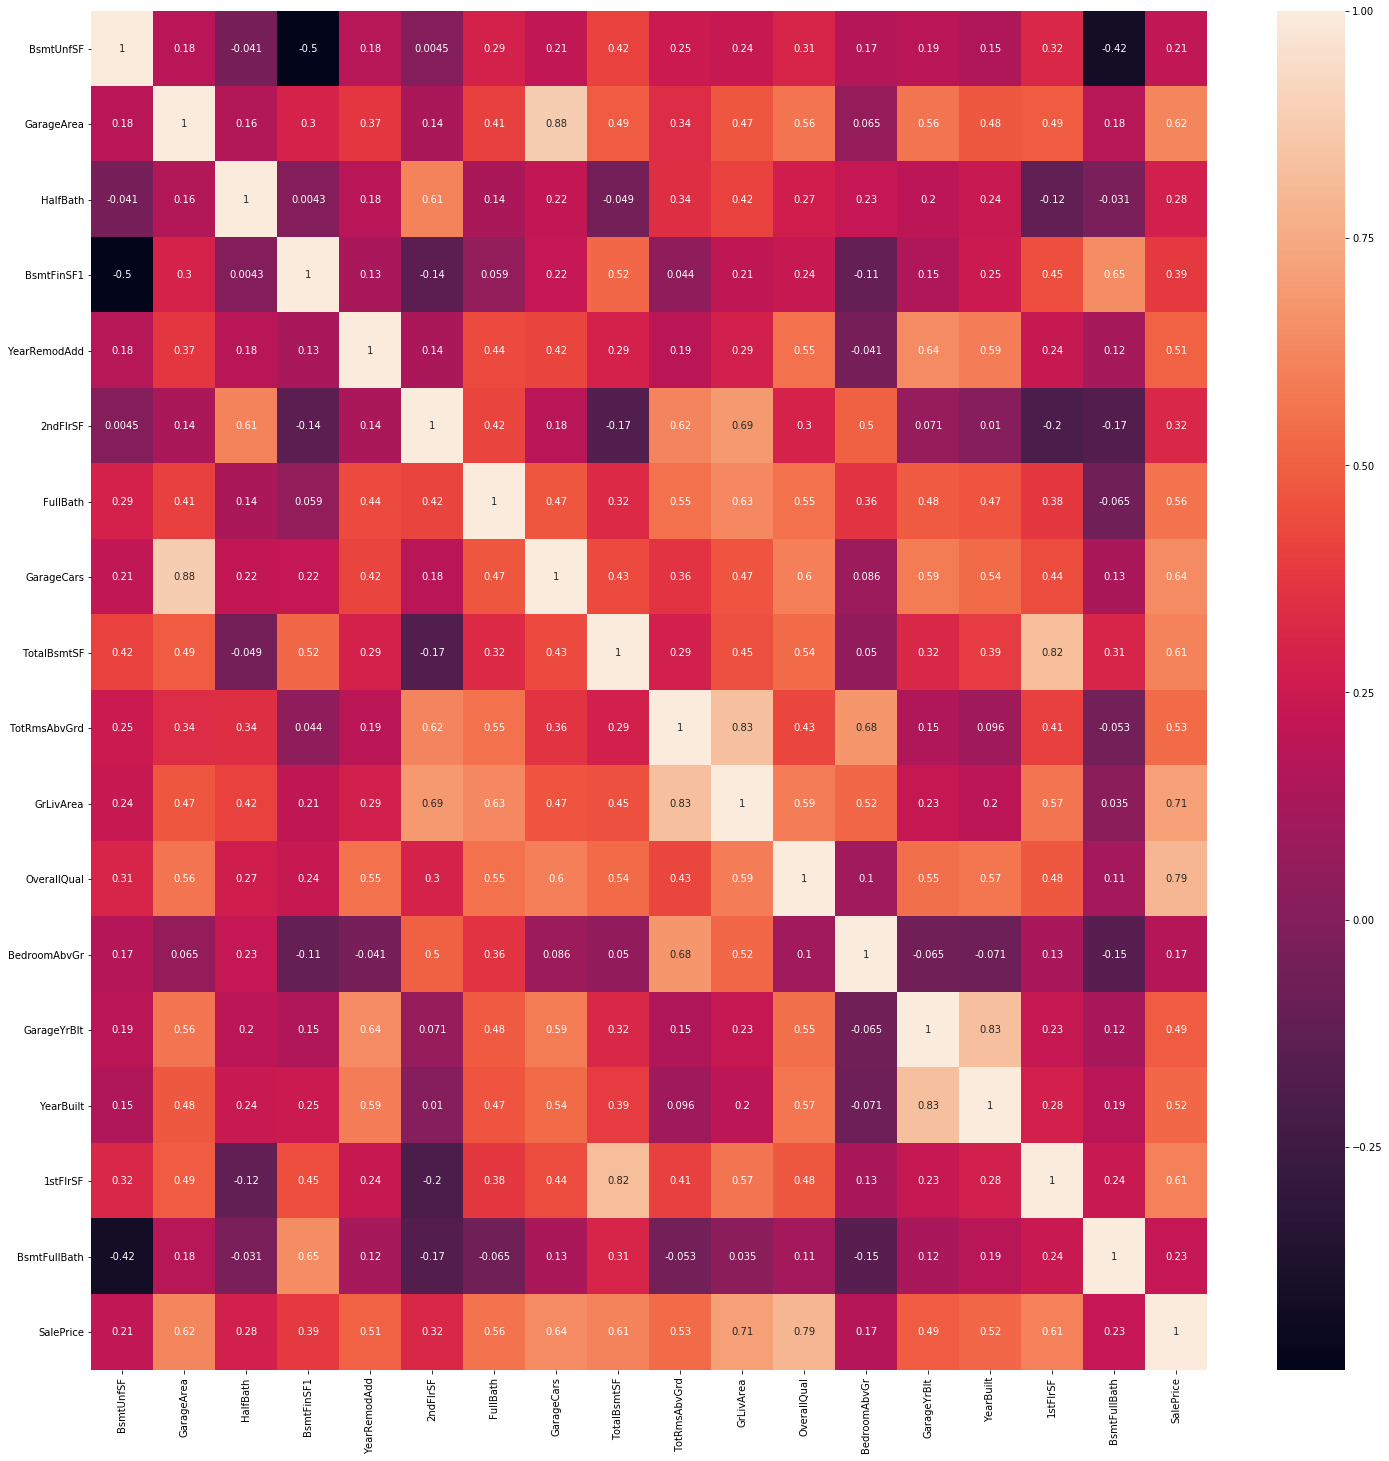

In [30]:
cols = list(cols)
cols.remove('SalePrice')
cols.append('SalePrice')
corr = train[cols].corr()
colnames = corr.index
plt.figure(figsize=(25, 25))
g = sns.heatmap(data=corr, annot=True)

### Data Processing

In [31]:
## Used later on for building regression models..
from sklearn.preprocessing import StandardScaler

def scale_data(train, test):
    cols = []
    for col in train.columns:
        print ("Scaling - "+col)
        if train[col].dtype != 'object' and col != 'SalePrice' and col != 'Id':
            cols.append(col)
    
    print ("Processing data")
    scaler = StandardScaler()
    scaler.fit(train[cols].values)
    train[cols] = scaler.transform(train[cols])
    test[cols] = scaler.transform(test[cols])
    return train, test
scaled_train, scaled_test = scale_data(train.copy(deep=True), test.copy(deep=True))

Scaling - MSSubClass
Scaling - MSZoning
Scaling - LotFrontage
Scaling - LotArea
Scaling - Street
Scaling - Alley
Scaling - LotShape
Scaling - LandContour
Scaling - Utilities
Scaling - LotConfig
Scaling - LandSlope
Scaling - Neighborhood
Scaling - Condition1
Scaling - Condition2
Scaling - BldgType
Scaling - HouseStyle
Scaling - OverallQual
Scaling - OverallCond
Scaling - YearBuilt
Scaling - YearRemodAdd
Scaling - RoofStyle
Scaling - RoofMatl
Scaling - Exterior1st
Scaling - Exterior2nd
Scaling - MasVnrType
Scaling - MasVnrArea
Scaling - ExterQual
Scaling - ExterCond
Scaling - Foundation
Scaling - BsmtQual
Scaling - BsmtCond
Scaling - BsmtExposure
Scaling - BsmtFinType1
Scaling - BsmtFinSF1
Scaling - BsmtFinType2
Scaling - BsmtFinSF2
Scaling - BsmtUnfSF
Scaling - TotalBsmtSF
Scaling - Heating
Scaling - HeatingQC
Scaling - CentralAir
Scaling - Electrical
Scaling - 1stFlrSF
Scaling - 2ndFlrSF
Scaling - LowQualFinSF
Scaling - GrLivArea
Scaling - BsmtFullBath
Scaling - BsmtHalfBath
Scaling - 

In [0]:
def get_one_hot_encoded(train, test, verbose=False):
    df = pd.concat([train.iloc[:, :-1], test], ignore_index=False)
    for col in df.columns:
        if df[col].dtype == 'object' and col != 'Id':
            if verbose:
                print ("Processing "+col)
            df[col] = pd.Categorical(df[col])
            dummies = pd.get_dummies(df[col], prefix="cat_"+col)
            df = pd.concat([df, dummies], axis=1)
            df.drop(columns=[col], inplace=True)
    train = df.iloc[:train.shape[0],:]
    test = df.iloc[train.shape[0]:, :]
    return train, test

In [0]:
sc_enc_train, sc_enc_test = get_one_hot_encoded(scaled_train.copy(deep=True), 
                                                scaled_test.copy(deep=True))
sc_enc_train['SalePrice'] = train['SalePrice']

In [34]:
sc_enc_train.shape, sc_enc_test.shape

((1460, 289), (1459, 288))

In [0]:
nc_enc_train, nc_enc_test = get_one_hot_encoded(train.copy(deep=True), 
                                                test.copy(deep=True))
nc_enc_train['SalePrice'] = train['SalePrice']

In [36]:
nc_enc_train.shape, nc_enc_test.shape

((1460, 289), (1459, 288))

In [37]:
final_train, final_test = scale_data(train.copy(deep=True), test.copy(deep=True))
final_train, final_test = get_one_hot_encoded(final_train.copy(deep=True), final_test.copy(deep=True))
final_train['SalePrice'] = train['SalePrice']
print(final_train.shape, final_test.shape)

Scaling - MSSubClass
Scaling - MSZoning
Scaling - LotFrontage
Scaling - LotArea
Scaling - Street
Scaling - Alley
Scaling - LotShape
Scaling - LandContour
Scaling - Utilities
Scaling - LotConfig
Scaling - LandSlope
Scaling - Neighborhood
Scaling - Condition1
Scaling - Condition2
Scaling - BldgType
Scaling - HouseStyle
Scaling - OverallQual
Scaling - OverallCond
Scaling - YearBuilt
Scaling - YearRemodAdd
Scaling - RoofStyle
Scaling - RoofMatl
Scaling - Exterior1st
Scaling - Exterior2nd
Scaling - MasVnrType
Scaling - MasVnrArea
Scaling - ExterQual
Scaling - ExterCond
Scaling - Foundation
Scaling - BsmtQual
Scaling - BsmtCond
Scaling - BsmtExposure
Scaling - BsmtFinType1
Scaling - BsmtFinSF1
Scaling - BsmtFinType2
Scaling - BsmtFinSF2
Scaling - BsmtUnfSF
Scaling - TotalBsmtSF
Scaling - Heating
Scaling - HeatingQC
Scaling - CentralAir
Scaling - Electrical
Scaling - 1stFlrSF
Scaling - 2ndFlrSF
Scaling - LowQualFinSF
Scaling - GrLivArea
Scaling - BsmtFullBath
Scaling - BsmtHalfBath
Scaling - 

In [0]:
final_train = treat_null(final_train)
final_test = treat_null_test(final_train, final_test)

In [39]:
print(final_train.shape, final_test.shape)

(1460, 289) (1459, 288)


### Question 3

In [40]:
score_cols = cols
binary_vars = []
for col in nc_enc_train.columns:
    if (col in cols):
        print("Column "+col+" has "+str(nc_enc_train[col].unique().shape))
    if nc_enc_train[col].unique().shape[0] == 2:
        binary_vars.append(col)

Column OverallQual has (10,)
Column YearBuilt has (112,)
Column YearRemodAdd has (61,)
Column BsmtFinSF1 has (637,)
Column BsmtUnfSF has (780,)
Column TotalBsmtSF has (721,)
Column 1stFlrSF has (753,)
Column 2ndFlrSF has (417,)
Column GrLivArea has (861,)
Column BsmtFullBath has (4,)
Column FullBath has (4,)
Column HalfBath has (3,)
Column BedroomAbvGr has (8,)
Column TotRmsAbvGrd has (12,)
Column GarageYrBlt has (98,)
Column GarageCars has (5,)
Column GarageArea has (441,)
Column SalePrice has (663,)


In [41]:
score_cols.extend(binary_vars)
# Dedup 
score_cols = list(set(score_cols))
print(len(score_cols))

270


In [42]:
## Get the corr
score_corr = nc_enc_train.corr()
sale_price_col = score_corr['SalePrice']
sale_price_col.drop('SalePrice', axis=0, inplace=True)
display_all(sale_price_col.shape)

(288,)

In [0]:
top_related = sale_price_col[(sale_price_col>0.5) | (sale_price_col < -0.5)]

In [0]:
def get_score(row):
    score = row * top_related
    return np.sum(score)

In [0]:
nc_enc_train['Score'] = nc_enc_train.loc[:, top_related.index].apply(get_score, axis=1)

In [46]:
print(nc_enc_train['Score'].max())
print(nc_enc_train['Score'].min())

13559.731128375408
2447.8593925349264


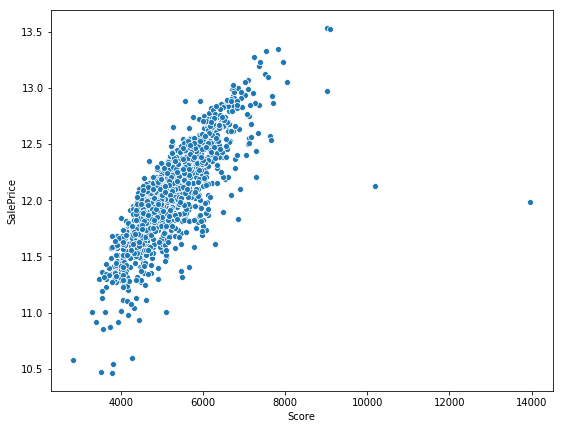

In [47]:
fig, ax = plt.subplots()
fig.set_size_inches(9, 7)
sns.scatterplot(x=nc_enc_train['Score']+400, y=np.log(nc_enc_train['SalePrice']))

**Looks like a neat and clean positive co-relation between the score and the SalePrice**

### Top N best and worst desirable houses based on our scores

In [48]:
temp = train.loc[nc_enc_train.nlargest(3, 'Score').index]
temp['Score'] = nc_enc_train.nlargest(3, 'Score')['Score']
display_all(temp)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Score
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000,13559.731128
524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750,9777.376253
1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,GasA,Ex,Y,SBrkr,2411,2065,0,4476,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.0,Fin,3,813,TA,TA,Y,171,78,0,0,0,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000,8683.285612


In [49]:
temp = train.loc[nc_enc_train.nsmallest(3, 'Score').index]
temp['Score'] = nc_enc_train.nsmallest(3, 'Score')['Score']
display_all(temp)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Score
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
534,20,RL,50.0,5000,Pave,NaN,Reg,Low,AllPub,Inside,Mod,BrkSide,Norm,Norm,1Fam,1Story,1,3,1946,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,Fa,Fa,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Fa,N,FuseF,334,0,0,334,0,0,1,0,1,1,Fa,2,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,39300,2447.859393
1101,30,RL,60.0,8400,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1Story,2,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,Fa,No,Rec,290,Unf,0,0,290,GasA,TA,N,FuseF,438,0,0,438,0,0,1,0,1,1,Fa,3,Typ,0,NaN,Detchd,1930.0,Unf,1,246,TA,TA,N,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2009,WD,Normal,60000,2903.648199
706,190,RM,70.0,5600,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,2fmCon,2Story,4,5,1930,1950,Hip,CompShg,VinylSd,Wd Shng,None,0.0,Fa,Fa,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Fa,N,SBrkr,372,720,0,1092,0,0,2,0,3,2,Fa,7,Mod,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,Othr,3500,7,2010,WD,Normal,55000,3005.254997


## *** Comments on the dream / desirable houses! ***
* It appears that the scoring function does a descent job in figuring out the most and least diserable houses to live in.
* Houses with the least scores have many things in common Eg. coincidently - cheap prices (I haven't included the `SalePrice` in computing the score have used only the co-relation of other variables to it), either a missing garrage type or detached, significantly lesser `LotArea`, too old built year i.e. `YearBuilt` I wouldn't like to live in a house that was built before WW2!!
* The best or the most desirable houses also have a lot of things in common, they mostly seem to be `2storey`, have significantly huge `LotArea`, realtively new build years etc. And above all, exorbitantly expensive. If I had a lot of money, I'd love to purchase one of them!!
* Some other observations - `GarageFinish`, `GarageFinish`, `PavedDrive`, `GarageCond` (Imp), `GarageArea`, `GarageType` (most important), `FireplaceQu`, `Fireplaces` (imp), `TotRmsAbvGrd`, `KitchenQual`, `HalfBath`, `FullBath`, `GrLivArea`, `2ndFlrSF`, `1stFlrSF`, `CentralAir`, `HeatingQC` etc. Excellent, desirable homes differ from the other for some of these variables.

### Question 2
Let's explore the highly co-related features that we got above!!

**1. An important Scatter Plot**

Text(0, 0.5, 'Log scale SalePrice')

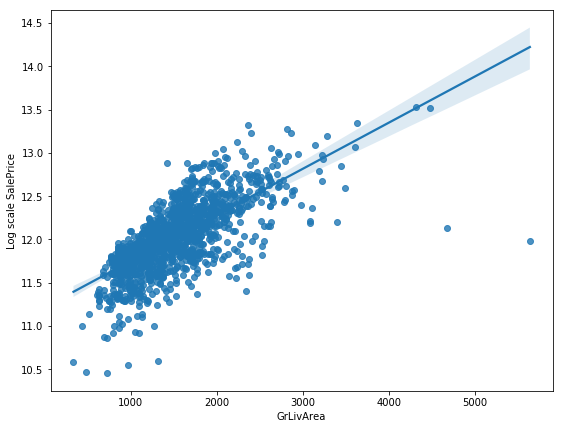

In [50]:
fig, ax = plt.subplots()
fig.set_size_inches(9, 7)
sns.regplot(x=train['GrLivArea'], y=np.log(train['SalePrice']), truncate=True)
plt.ylabel("Log scale SalePrice")

**Wonderful, as per our observaton we have a 0.71 corr between these two variables, and the above plot validates our observation with a nice regression line!!**

**2. An important histogram / bar chart**  
Let's study the distribution of sale prices in our data set!!

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

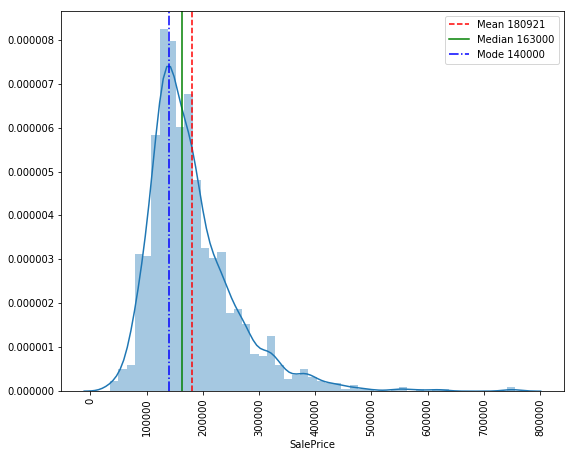

In [51]:
fig, ax = plt.subplots()
fig.set_size_inches(9, 7)

mean=train['SalePrice'].mean()
median=train['SalePrice'].median()
mode=train['SalePrice'].mode()[0]

g = sns.distplot(a=train['SalePrice'], kde=True, ax=ax)
ax.axvline(mean, color='r', linestyle='--')
ax.axvline(median, color='g', linestyle='-')
ax.axvline(mode, color='b', linestyle='-.')

plt.legend({'Mean '+str(int(mean)):mean,'Median '+str(int(median)):median,'Mode '+str(int(mode)):mode})
plt.setp(g.get_xticklabels(), rotation=90)

From the above diagram we can say that our distribution of the `SalePrice` is skewed. It can be quantified using the following metric called 'Kurtosis'. From the above graph, we can say that most houses are worth 140K and the mean value of houses is 180K.

In [52]:
print ('Kurtosis of the above distribution is - ' + str(train['SalePrice'].kurtosis()))

Kurtosis of the above distribution is - 6.536281860064529


**3. Line chart**

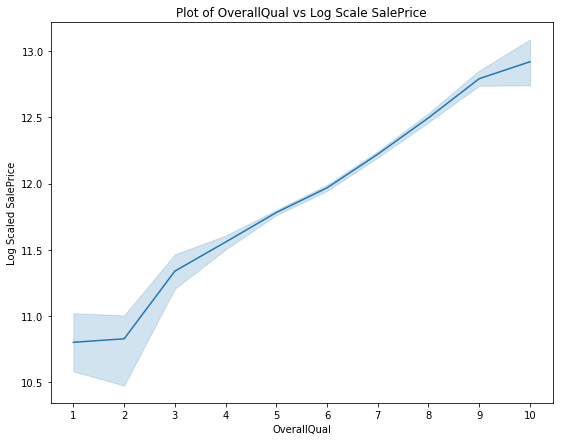

In [53]:
fig, ax = plt.subplots()
fig.set_size_inches(9, 7)
sns.lineplot(x=train['OverallQual'], y=np.log(train['SalePrice']))
plt.title('Plot of OverallQual vs Log Scale SalePrice')
plt.xticks(np.arange(1,11))
plt.ylabel('Log Scaled SalePrice')
#plt.ayhspan(3, 11, color='red', alpha=0.2)
plt.show()

From the above line plot, we can infer that as `OverallQual` goes up, the Log scale of `SalePrice` increases. We can also say that, for lower and higer, the variance is also high but for middle prices, (like for `OverallQual` in (4, 8)) the variance is Log scale of `ScalePrice` is low!! So, it's going to be easy for our model to predict house prices if  `OverallQual` are between (4, 8), but hard if it's in the other ends!

**Other interesting Plots**

* `OverallQual` looks highly related to `SalePrice` let's explore!

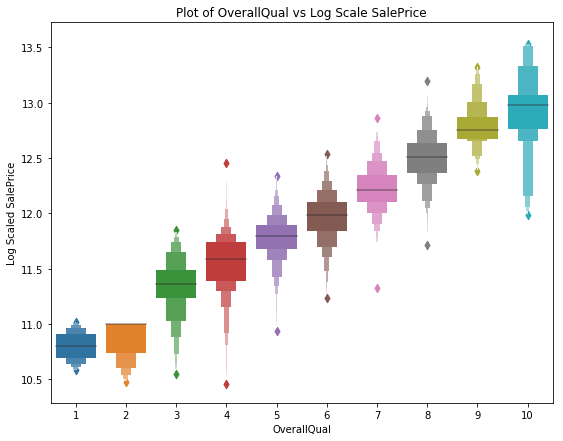

In [54]:
fig, ax = plt.subplots()
fig.set_size_inches(9, 7)
sns.boxenplot(x=train['OverallQual'], y=np.log(train['SalePrice']))
plt.title('Plot of OverallQual vs Log Scale SalePrice')
plt.xticks(np.arange(0,10))
plt.ylabel('Log Scaled SalePrice')
#plt.ayhspan(3, 11, color='red', alpha=0.2)
plt.show()

From the above plot it's quite clear that with the increase in the `OverallQual` i.e. with expensive material, the cost distributions of the `SalePrice` generally grow up!!

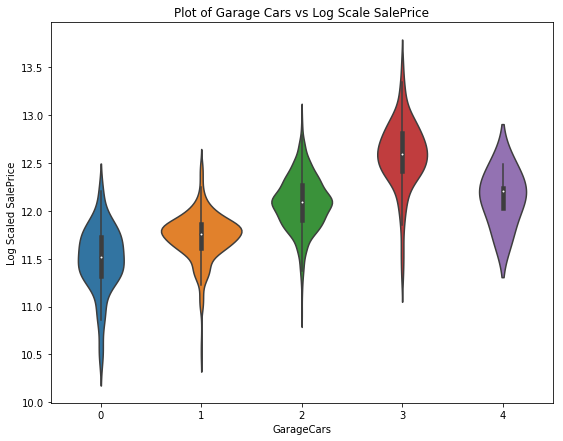

In [55]:
fig, ax = plt.subplots()
fig.set_size_inches(9, 7)
sns.violinplot(x=train['GarageCars'], y=np.log(train['SalePrice']))
plt.title('Plot of Garage Cars vs Log Scale SalePrice')
plt.xticks(np.arange(0,5))
plt.ylabel('Log Scaled SalePrice')
#plt.ayhspan(3, 11, color='red', alpha=0.2)
plt.show()

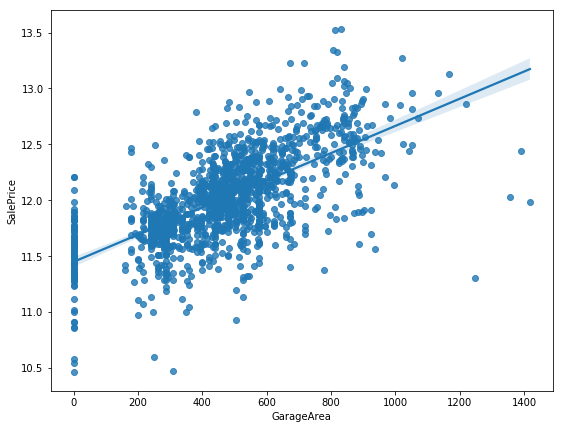

In [56]:
fig, ax = plt.subplots()
fig.set_size_inches(9, 7)
sns.regplot(x=train['GarageArea'], y=np.log(train['SalePrice']), truncate=True)

**Nice Positive Co-relation again!!**

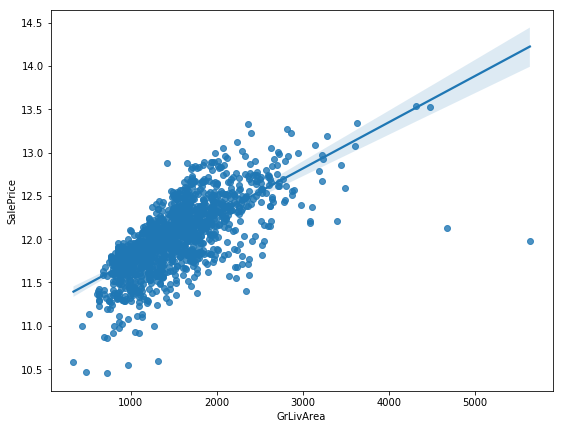

In [57]:
fig, ax = plt.subplots()
fig.set_size_inches(9, 7)
sns.regplot(x=train['GrLivArea'], y=np.log(train['SalePrice']), truncate=True)

`GrLivArea` Yet another positive co-relation of course with some outliers!!

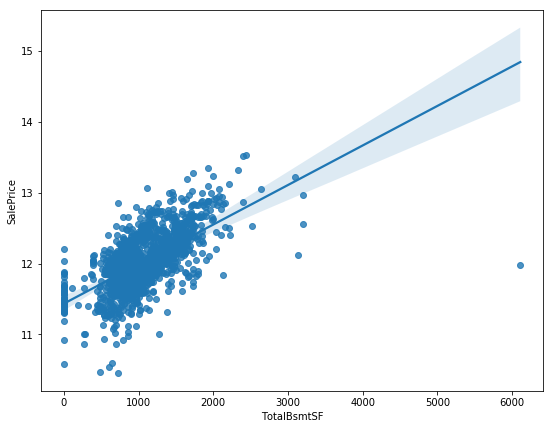

In [58]:
fig, ax = plt.subplots()
fig.set_size_inches(9, 7)
sns.regplot(x=train['TotalBsmtSF'], y=np.log(train['SalePrice']), truncate=True)

`TotalBsmtSF` Yet another positive co-relation of course with some outliers!!

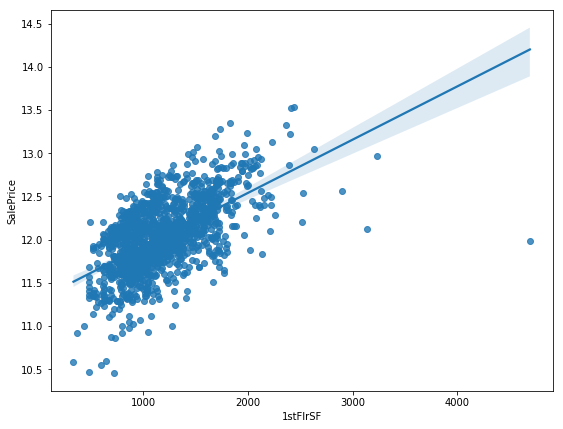

In [59]:
fig, ax = plt.subplots()
fig.set_size_inches(9, 7)
sns.regplot(x=train['1stFlrSF'], y=np.log(train['SalePrice']), truncate=True)

`1stFlrSF` Yet another positive co-relation of course with some outliers!!

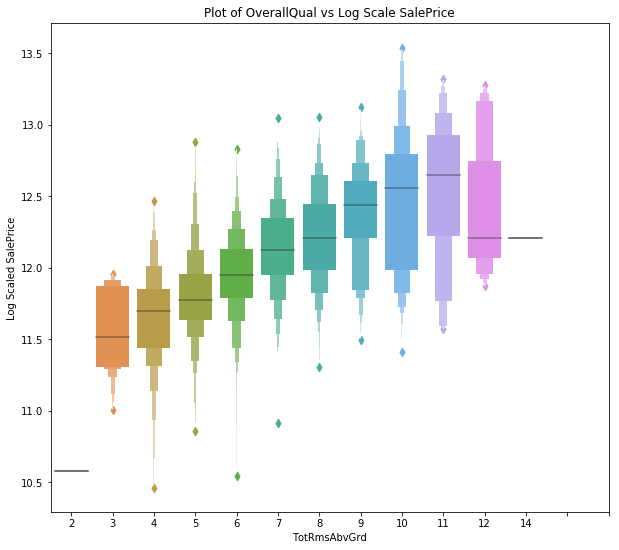

In [60]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 9)
sns.boxenplot(x=train['TotRmsAbvGrd'], y=np.log(train['SalePrice']))
plt.title('Plot of OverallQual vs Log Scale SalePrice')
plt.xticks(np.arange(0,14))
plt.ylabel('Log Scaled SalePrice')
#plt.ayhspan(3, 11, color='red', alpha=0.2)
plt.show()

Here, I find similar trend as that of `OverallQual`

### Question 6 
Simple Linear Regression Model  
![Imgur](https://i.imgur.com/ogV7jAe.png)

In [0]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_train.drop(columns=['SalePrice']), np.log(final_train['SalePrice']), test_size=0.95, random_state=9)

In [63]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
print (metrics.mean_squared_log_error(y_test, np.exp(model.predict(X_test))))

89.40381341291219


**Submit the Predictions!**

In [0]:
subms = pd.read_csv('My Drive/Colab Notebooks/sample_submission.csv')
subms['SalePrice'] = np.exp(model.predict(final_test))
subms.to_csv('My Drive/Colab Notebooks/Regression.csv')

The Model doesn't look impressive!

### Question 4

In [0]:
usc_train = treat_null(nc_enc_train)
unc_test = treat_null_test(nc_enc_train, nc_enc_test)

In [0]:
top_related = sale_price_col[(sale_price_col>0.3) | (sale_price_col < -0.3)]

In [0]:
from sklearn.metrics import pairwise_distances
dstX = pairwise_distances(usc_train[top_related.index], metric='euclidean')
dstF = pairwise_distances(final_train[top_related.index], metric='euclidean')

In [69]:
top_related.index

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'cat_Neighborhood_NoRidge',
       'cat_Neighborhood_NridgHt', 'cat_Exterior1st_VinylSd',
       'cat_Exterior2nd_VinylSd', 'cat_MasVnrType_None',
       'cat_MasVnrType_Stone', 'cat_ExterQual_Ex', 'cat_ExterQual_Gd',
       'cat_ExterQual_TA', 'cat_Foundation_CBlock', 'cat_Foundation_PConc',
       'cat_BsmtQual_Ex', 'cat_BsmtQual_TA', 'cat_BsmtExposure_Gd',
       'cat_BsmtFinType1_GLQ', 'cat_HeatingQC_Ex', 'cat_HeatingQC_TA',
       'cat_KitchenQual_Ex', 'cat_KitchenQual_Gd', 'cat_KitchenQual_TA',
       'cat_FireplaceQu_Gd', 'cat_GarageType_Attchd', 'cat_GarageType_Detchd',
       'cat_GarageFinish_Fin', 'cat_GarageFinish_Unf', 'cat_SaleType_New',
       'cat_SaleCondition_Partial'],
      dtype='object')

In [70]:
res0 = pd.concat([train.iloc[0,:], train.iloc[np.argmin(dstX[0,np.nonzero(dstX[0,:])]),:]], axis=1)
display_all(res0.T)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1366,60,FV,NaN,7500,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,None,0,Gd,TA,PConc,Gd,TA,No,GLQ,533,Unf,0,281,814,GasA,Ex,Y,SBrkr,814,860,0,1674,1,0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,2000,RFn,2,663,TA,TA,Y,0,96,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,Normal,216000


In [71]:
res1 = pd.concat([train.iloc[0,:], train.iloc[np.argmax(dstX[0,np.nonzero(dstX[0,:])]),:]], axis=1)
display_all(res1.T)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1298,180,RM,35,3675,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,SFoyer,6,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,82,TA,TA,PConc,Gd,TA,Gd,GLQ,547,Unf,0,0,547,GasA,Gd,Y,SBrkr,1072,0,0,1072,1,0,2,0,2,1,TA,5,Typ,0,NaN,Basment,2005,Fin,2,525,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,6,2006,New,Partial,140000


In [72]:
res0 = pd.concat([train.iloc[0,:], train.iloc[np.argmin(dstF[0,np.nonzero(dstF[0,:])]),:]], axis=1)
display_all(res0.T)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1240,20,RL,64,9037,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2006,2006,Hip,CompShg,VinylSd,VinylSd,BrkFace,32,Gd,TA,PConc,Gd,TA,Av,GLQ,428,Unf,0,1048,1476,GasA,Ex,Y,SBrkr,1484,0,0,1484,0,0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2006,RFn,2,472,TA,TA,Y,120,33,0,0,0,0,NaN,NaN,NaN,0,12,2007,WD,Normal,265900


In [73]:
res1 = pd.concat([train.iloc[0,:], train.iloc[np.argmax(dstF[0,np.nonzero(dstF[0,:])]),:]], axis=1)
display_all(res1.T)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1298,180,RM,35,3675,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,SFoyer,6,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,82,TA,TA,PConc,Gd,TA,Gd,GLQ,547,Unf,0,0,547,GasA,Gd,Y,SBrkr,1072,0,0,1072,1,0,2,0,2,1,TA,5,Typ,0,NaN,Basment,2005,Fin,2,525,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,6,2006,New,Partial,140000


#### Observations


1.   By throwing all the variables / highly co-related variables to the euclidean distance, doen't yeild satisfactory results. Even after scaling the data set.
2.   Therefore, to make it perform better, handpicking features, looks as key 
technique. So, in the following attempt, I handpick features and try to see if 
the Euclidean distance metric works for it!



In [0]:
dstX = pairwise_distances(usc_train[['YearBuilt','LotArea', '1stFlrSF','GrLivArea', 'GarageArea']], metric='euclidean')
dstF = pairwise_distances(final_train[['YearBuilt','LotArea', '1stFlrSF','GrLivArea', 'GarageArea']], metric='euclidean')

In [99]:
res1 = pd.concat([train.iloc[np.argmax(np.min(dstF[0,np.nonzero(dstF[0,:])]) == dstF[0,:]),:], train.iloc[0,:]], axis=1)
display_all(res1.T)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1241,60,RL,65,8158,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,252,Gd,TA,PConc,Gd,TA,No,GLQ,550,Unf,0,334,884,GasA,Ex,Y,SBrkr,884,884,0,1768,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003,RFn,2,543,TA,TA,Y,0,63,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,224900
1,60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


In [92]:
res1 = pd.concat([train.iloc[0,:], train.iloc[np.argmax(dstF[0,np.nonzero(dstF[0,:])]),:]], axis=1)
display_all(res1.T)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
313,190,RM,65,7800,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,2fmCon,1.5Fin,5,7,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Mn,Rec,507,Unf,0,286,793,GasA,TA,Y,SBrkr,793,325,0,1118,1,0,1,0,3,1,TA,5,Typ,1,Gd,Detchd,1939,Unf,2,410,TA,TA,Y,0,0,0,0,271,0,NaN,MnPrv,NaN,0,5,2006,WD,Normal,119900




1.   After providing, hand-picked features, the Euclidean distance manages to perform an 'Ok' job in optimizing the differences between the values of those two values for the given house pairs only!
2.   Overall, it's not that effective!!



In [0]:
dstF = pairwise_distances(usc_train[['YearBuilt']], metric='l2')

In [96]:
res1 = pd.concat([train.iloc[np.argmax(np.min(dstF[0,np.nonzero(dstF[0,:])]) == dstF[0,:]),:], train.iloc[0,:]], axis=1)
display_all(res1.T)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,20,RL,75,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
1,60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


In [97]:
res1 = pd.concat([train.iloc[0,:], train.iloc[np.argmax(dstF[0,:]),:]], axis=1)
display_all(res1.T)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1350,70,RM,50,5250,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,8,5,1872,1987,Gable,CompShg,MetalSd,MetalSd,None,0,TA,Gd,BrkTil,TA,Fa,No,LwQ,259,Unf,0,425,684,OthW,Fa,N,SBrkr,938,1215,205,2358,0,0,2,0,4,1,TA,8,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,54,20,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,122000


In the above experiment, I just try to optimize `YearBuilt` and it works good in both the cases i.e. max and minimun distance!

### Question 5

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

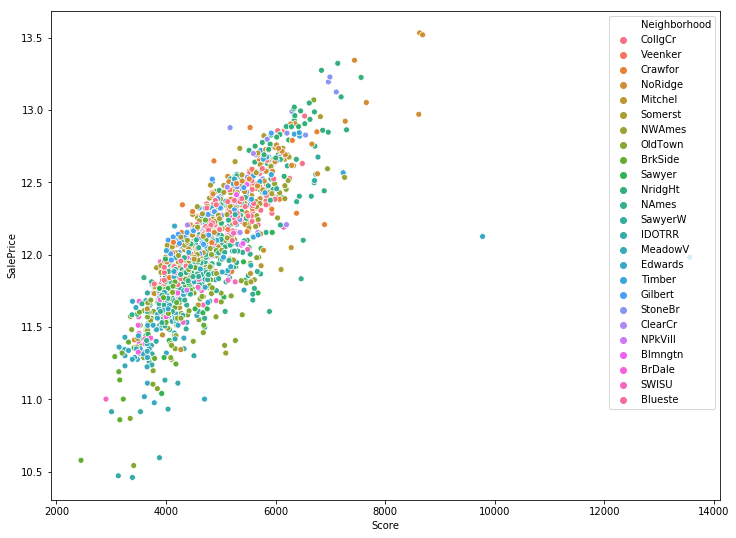

In [103]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 9)
sns.scatterplot(x='Score', y=np.log(nc_enc_train['SalePrice']), hue=train['Neighborhood'], data=nc_enc_train)

**The above diagram shows clustering using only the score that we computed earlier vs the SalePrice within different Neighbourhoods**

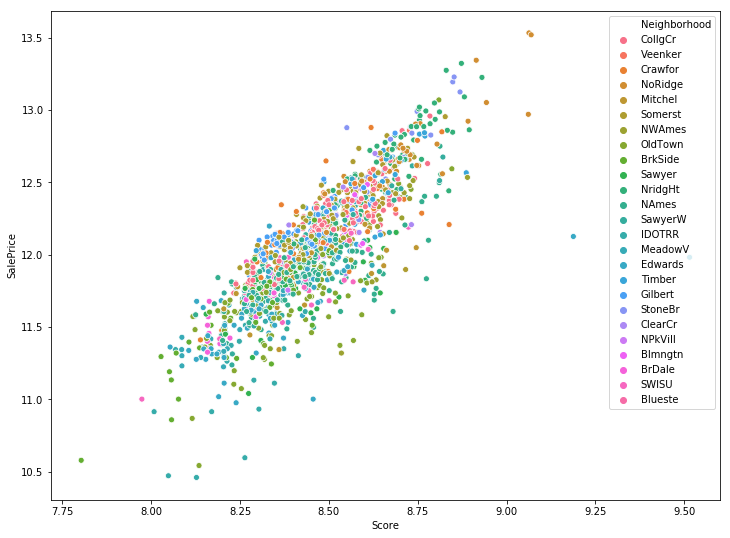

In [107]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 9)
sns.scatterplot(x=np.log(nc_enc_train['Score']), y=np.log(nc_enc_train['SalePrice']), hue=train['Neighborhood'], data=nc_enc_train)

**Score on log scale!**

In [0]:
all_cols_except_neighborhood = []
for col in nc_enc_train.columns:
  if 'Neighborhood' not in col:
    print(col)
    all_cols_except_neighborhood.append(col)

In [0]:
final_train['Score'] = nc_enc_train['Score']

In [0]:
comps = pca.fit_transform(final_train[all_cols_except_neighborhood])
df = pd.DataFrame({'pc1':comps[:,0], 'pc2':comps[:,1], 'pc3':comps[:,2]})
df['Neighborhood'] = train['Neighborhood']                        

In [0]:
df.dropna(inplace=True)

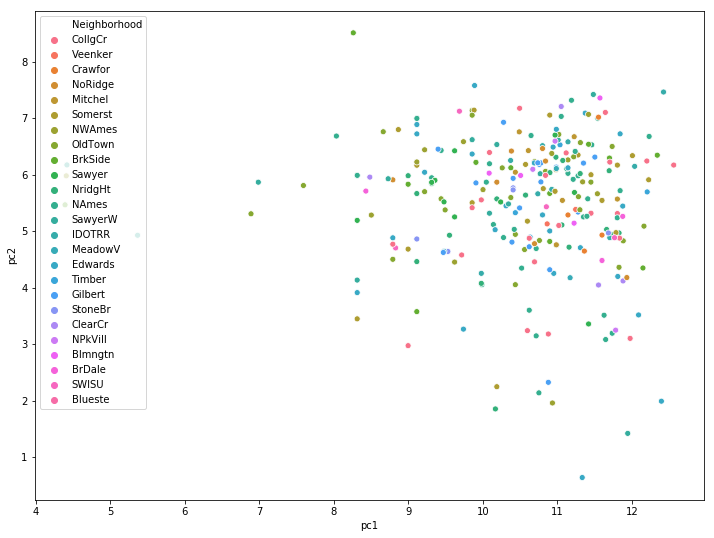

In [135]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 9)
sns.scatterplot(x=np.log(df['pc1']), y=np.log(df['pc2']), hue=df['Neighborhood'], data=df)

In [136]:
import plotly.express as px
df.dropna(inplace=True)
fig = px.scatter_3d(df, x='pc1', y='pc2', z='pc3', color='Neighborhood')
fig.show()

In [0]:
comps = pca.fit_transform(final_train[['Score', 'SalePrice', 'YearBuilt']])
df = pd.DataFrame({'pc1':comps[:,0], 'pc2':comps[:,1], 'pc3':comps[:,2]})
df['Neighborhood'] = train['Neighborhood']   
df.dropna(inplace=True)

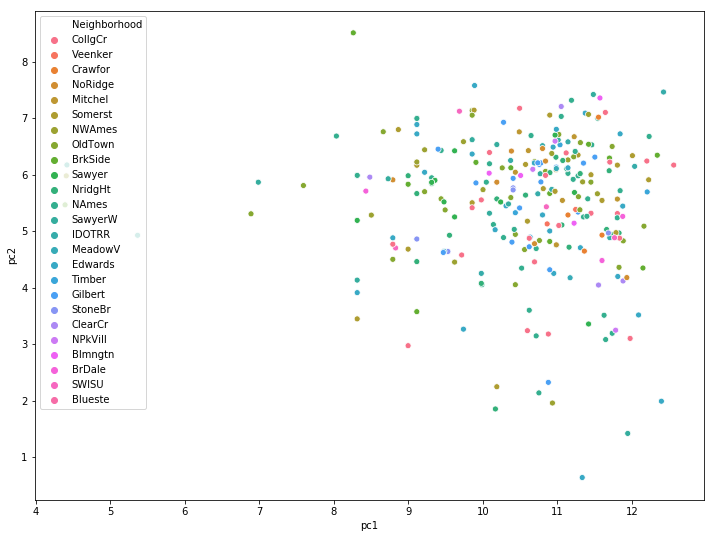

In [139]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 9)
sns.scatterplot(x=np.log(df['pc1']), y=np.log(df['pc2']), hue=df['Neighborhood'], data=df)

In [140]:
df.dropna(inplace=True)
fig = px.scatter_3d(df, x='pc1', y='pc2', z='pc3', color='Neighborhood')
fig.show()

In [0]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 9)
sns.scatterplot(x=np.log(final_train['Score']), y=np.log(final_train['pc2']), hue=df['Neighborhood'], data=final_train)

In [0]:
df.dropna(inplace=True)
temp = pd.DataFrame()
temp['SalePriceLog'] = np.log(final_train['SalePrice'])
temp['ScoreLog'] = np.log(final_train['Score'])
temp['pc1'] = df['pc1']
temp['Neighborhood'] = train['Neighborhood']
temp.dropna(inplace=True)
fig = px.scatter_3d(temp, x='SalePriceLog', y='ScoreLog', z='pc1', color='Neighborhood')
fig.show()

In [142]:
temp['Neighborhood'].unique().shape

(25,)

**I cannot find a clear pattern by merely using PCA trying KMeans clustering**

In [160]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=25, random_state=9)
kmeans.fit(df[['pc1', 'pc2']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=25, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=9, tol=0.0001, verbose=0)

In [0]:
preds = kmeans.predict(df[['pc1', 'pc2']])

In [162]:
np.unique(preds).shape

(25,)

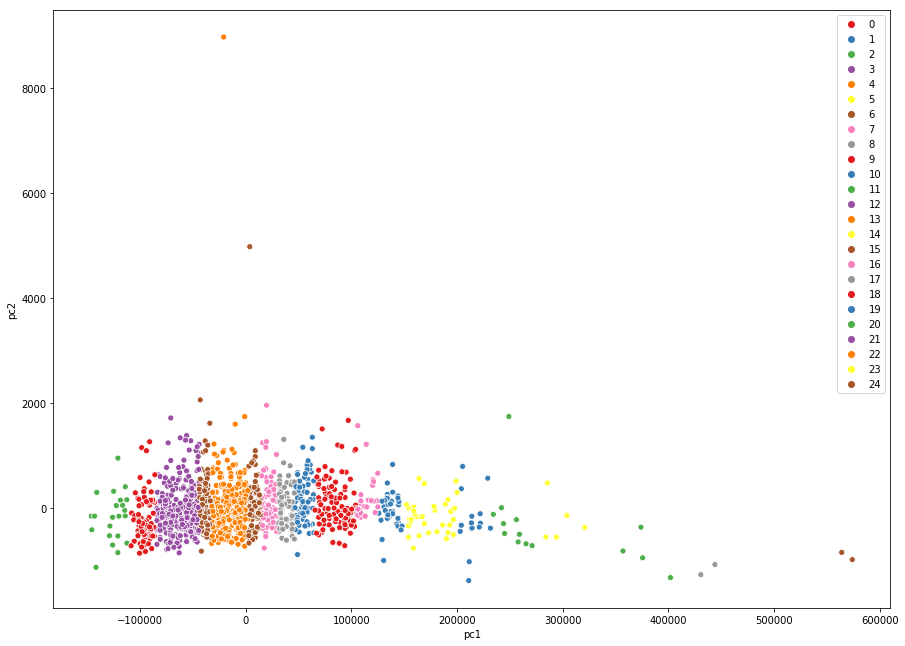

In [163]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 11)
sns.scatterplot(x=df['pc1'], y=df['pc2'], hue=preds, palette=sns.color_palette("Set1", n_colors=np.unique(preds).shape[0]))

Text(0.5, 1.0, 'Original clusters of neighborhoods')

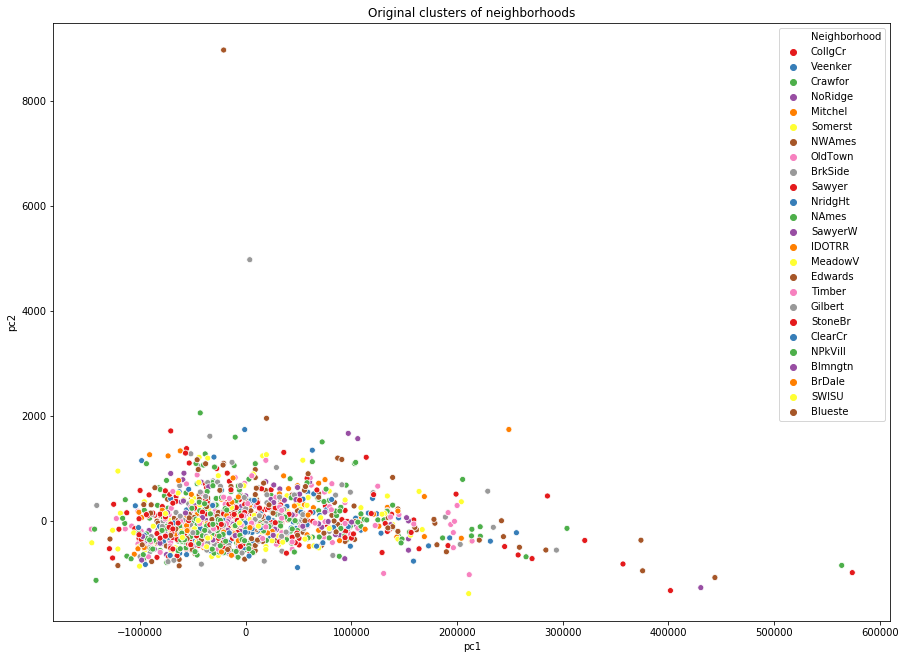

In [193]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 11)
sns.scatterplot(x=df['pc1'], y=df['pc2'], hue=temp['Neighborhood'], palette=sns.color_palette("Set1", n_colors=temp['Neighborhood'].unique().shape[0]))
plt.title('Original clusters of neighborhoods')

#### Observations
From the above plots, I can see that the clusters for the principal components 
are all around! and even in the original data (using principal components) there
is no clear distinction / separation between neighbourhoods. Therefore, our K-Means algorithm clustering does not yeild impressive results!

#### Picking up variables that are highly co-related with Neighborhoods

In [0]:
all_cols_neighborhood = []
for col in nc_enc_train.columns:
  if 'Neighborhood' in col:
    print(col)
    all_cols_neighborhood.append(col)

In [0]:
corr = final_train.corr()

In [0]:
tp = corr[all_cols_neighborhood[0]]

In [0]:
top_related = tp[(tp>0.3) | (tp < -0.3)]

In [175]:
top_related

cat_Neighborhood_Blmngtn    1.0
Name: cat_Neighborhood_Blmngtn, dtype: float64

In [0]:
high_corr = []
for col in all_cols_neighborhood:
  tp = corr[col]
  top_related = tp[((tp>0.3) | (tp < -0.3)) & (tp < 1)]
  high_corr.extend(top_related.index.to_list())

In [0]:
high_corr = list(set(high_corr))

In [0]:
comps = pca.fit_transform(final_train[high_corr])
df = pd.DataFrame({'pc1':comps[:,0], 'pc2':comps[:,1], 'pc3':comps[:,2]})
df['Neighborhood'] = train['Neighborhood']        

In [0]:
df.dropna(inplace=True)

In [194]:
kmeans = KMeans(n_clusters=25, random_state=9)
kmeans.fit(df[['pc1', 'pc2']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=25, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=9, tol=0.0001, verbose=0)

In [0]:
preds = kmeans.predict(df[['pc1', 'pc2']])

Text(0.5, 1.0, 'After getting principal components of Highly co-related variabls')

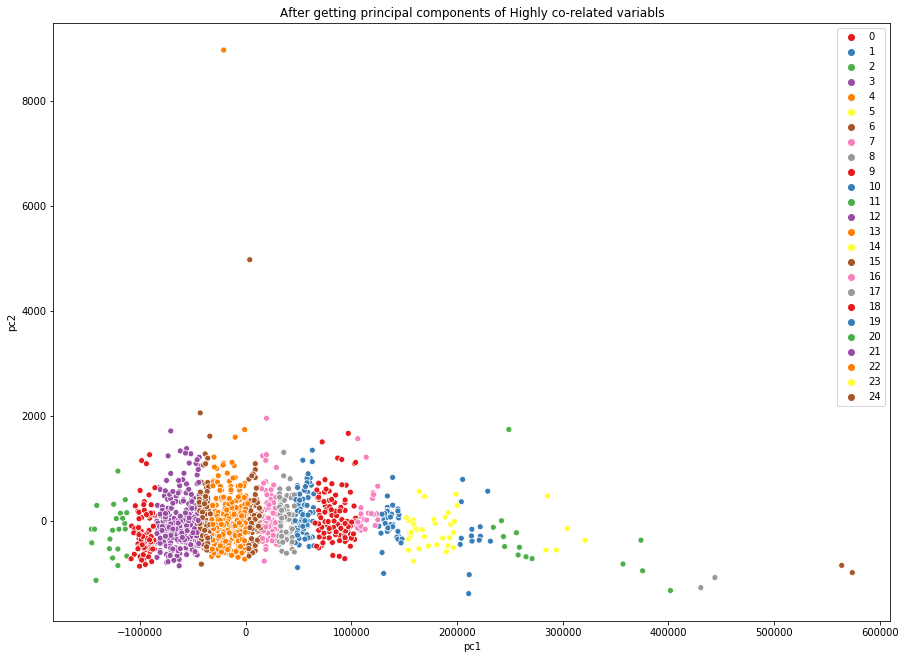

In [197]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 11)
sns.scatterplot(x=df['pc1'], y=df['pc2'], hue=preds, palette=sns.color_palette("Set1", n_colors=np.unique(preds).shape[0]))
plt.title("After getting principal components of Highly co-related variabls")

**With this , we can see that the far away clusters (the last two - 4) points are captured properly with these variables**

Text(0.5, 1.0, 'After distance based clustering only on Score and SalePrice variables')

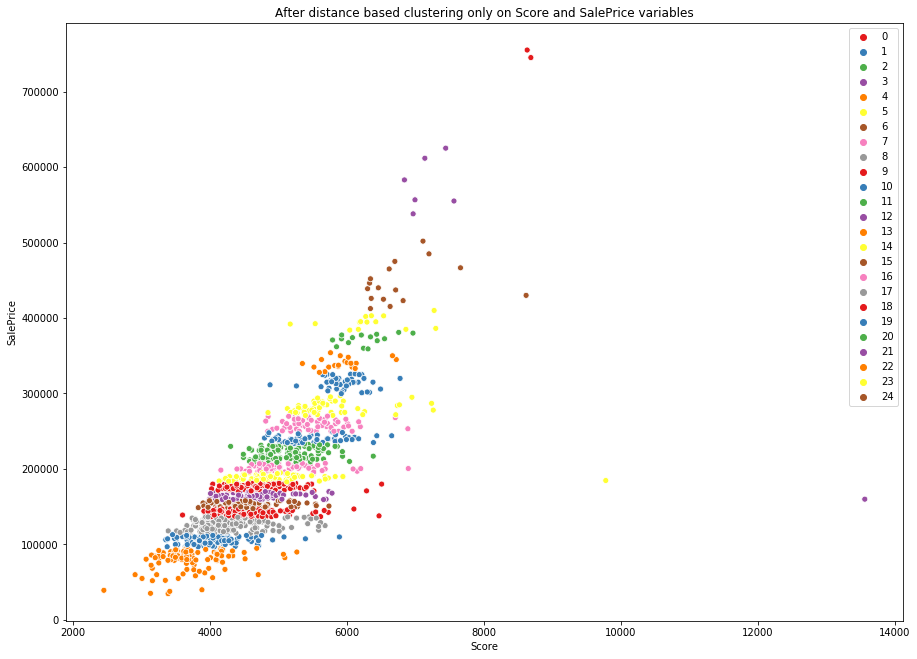

In [199]:
kmeans = KMeans(n_clusters=25, random_state=9)
kmeans.fit(final_train[['Score', 'SalePrice']])
preds = kmeans.predict(final_train[['Score', 'SalePrice']])
fig, ax = plt.subplots()
fig.set_size_inches(15, 11)
sns.scatterplot(x=final_train['Score'], y=final_train['SalePrice'], hue=preds, palette=sns.color_palette("Set1", n_colors=np.unique(preds).shape[0]))
plt.title("After distance based clustering only on Score and SalePrice variables")

Text(0.5, 1.0, 'After distance based clustering only on Score and SalePrice variables')

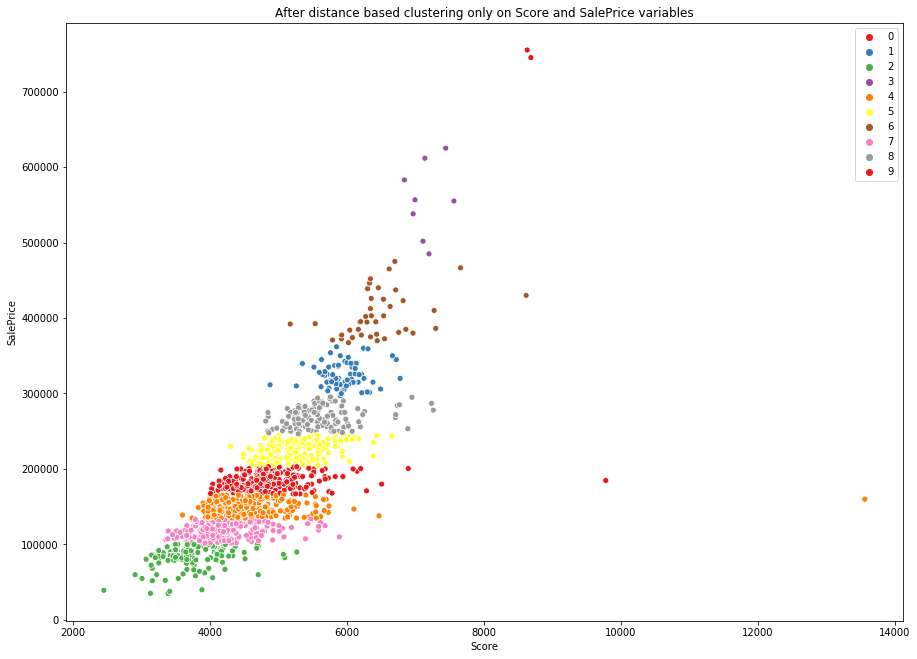

In [202]:
kmeans = KMeans(n_clusters=10, random_state=9)
kmeans.fit(final_train[['Score', 'SalePrice']])
preds = kmeans.predict(final_train[['Score', 'SalePrice']])
fig, ax = plt.subplots()
fig.set_size_inches(15, 11)
sns.scatterplot(x=final_train['Score'], y=final_train['SalePrice'], hue=preds, palette=sns.color_palette("Set1", n_colors=np.unique(preds).shape[0]))
plt.title("After distance based clustering only on Score and SalePrice variables")

### Insights
The above clustering plots (mostly all plotted without the 'Neighborhood' column) suggest that the houses could be similar accross different neighborhoods. This similarity accross different neighborhoods could be attributed to various other attributes related to the houses! Eg. BuiltYear, Area in Squarefoot, Guarage Area, Condition of rooms, SalePrice etc. Therefore,
it need not be the case that houses only within the neighborhoods are bound to be similar. In fact, houses that don't lie in the same neighborhoods could be similar in various other aspects!!

Text(0.5, 1.0, 'Original distance based clustering only on Score and SalePrice variables')

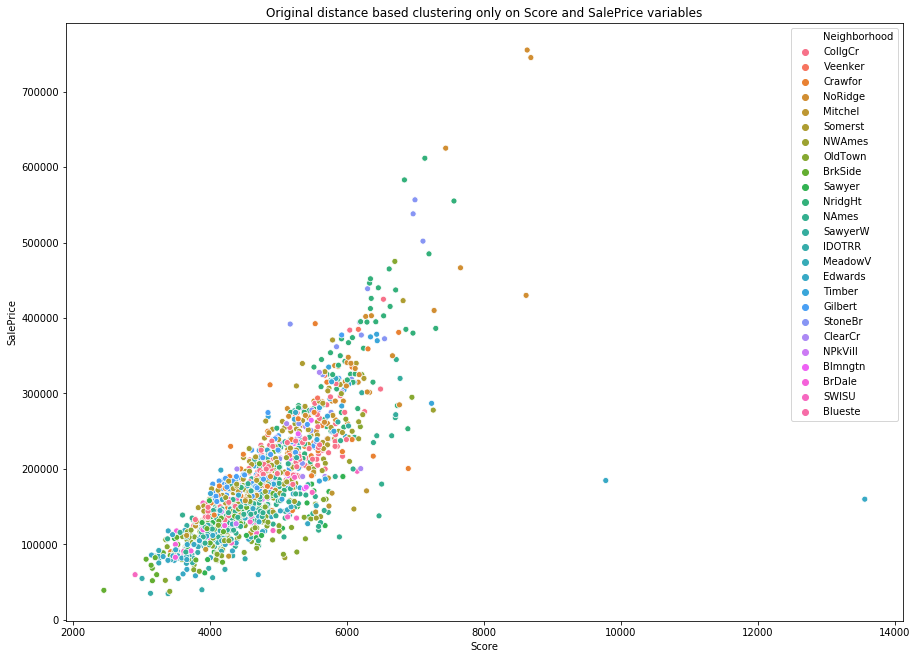

In [201]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 11)
sns.scatterplot(x=final_train['Score'], y=final_train['SalePrice'], hue=train['Neighborhood'])
plt.title("Original distance based clustering only on Score and SalePrice variables")

### Question 8

In [294]:
corr = train.corr()
colnames = corr.index
k = corr.unstack()
so = k.sort_values()
mask = ((so<-0.7) | (so > 0.7) & (so != 1))
colnames = so[mask].index
cols = []
for k in colnames:
    cols.append(k[0])
    cols.append(k[1])
cols = set(cols)
print (len(cols))

10


In [295]:
cols.remove('SalePrice')
print(list(cols))

['GarageArea', 'GarageYrBlt', 'TotalBsmtSF', '1stFlrSF', 'OverallQual', 'GrLivArea', 'TotRmsAbvGrd', 'GarageCars', 'YearBuilt']


In [296]:
k = corr.unstack()
so = k.sort_values()
mask = ((so >-0.001) & (so < 0.001) & (so != 1))
colnames = so[mask].index
cols_low = []
for k in colnames:
    cols_low.append(k[0])
    cols_low.append(k[1])
cols_low = set(cols_low)
print (len(cols_low))

7


#### Feature with lowest Co-relation

In [297]:
cols_low

{'3SsnPorch',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'LowQualFinSF',
 'MiscVal',
 'TotalBsmtSF'}

In [0]:
cols_low.remove('FullBath')
cols_low.remove('TotalBsmtSF')
cols.remove('TotalBsmtSF')

In [0]:
hm = {}
hm_true = {}
for col in cols:
  # Build model on true data
  X_train, X_test, y_train, y_test = train_test_split(final_train[col], np.log(final_train['SalePrice']), test_size=0.90, random_state=9)
  model = LinearRegression()
  model.fit(X_train.values.reshape(-1, 1), y_train)
  hm_true[col] = np.sqrt(metrics.mean_squared_error(model.predict(X_test.values.reshape(-1, 1)), y_test))
  scores = []
  # Build 100 models with different permutations
  for i in range(100):
    # Shuffle the Train set
    X_train = X_train.sample(frac=1, random_state=2 )
    # Build model
    model = LinearRegression()
    model.fit(X_train.values.reshape(-1, 1), y_train)
    scores.append(np.sqrt(metrics.mean_squared_error(model.predict(X_test.values.reshape(-1, 1)), y_test)))
  hm[col] = scores

In [0]:
for col in cols_low:
  # Build model on true data
  X_train, X_test, y_train, y_test = train_test_split(final_train[col], np.log(final_train['SalePrice']), test_size=0.90, random_state=9)
  model = LinearRegression()
  model.fit(X_train.values.reshape(-1, 1), y_train)
  hm_true[col] = np.sqrt(metrics.mean_squared_error(model.predict(X_test.values.reshape(-1, 1)), y_test))
  scores = []
  # Build 100 models with different permutations
  for i in range(100):
    # Shuffle the Train set
    X_train = X_train.sample(frac=1, random_state=2 )
    # Build model
    model = LinearRegression()
    model.fit(X_train.values.reshape(-1, 1), y_train)
    scores.append(np.sqrt(metrics.mean_squared_error(model.predict(X_test.values.reshape(-1, 1)), y_test)))
  hm[col] = scores

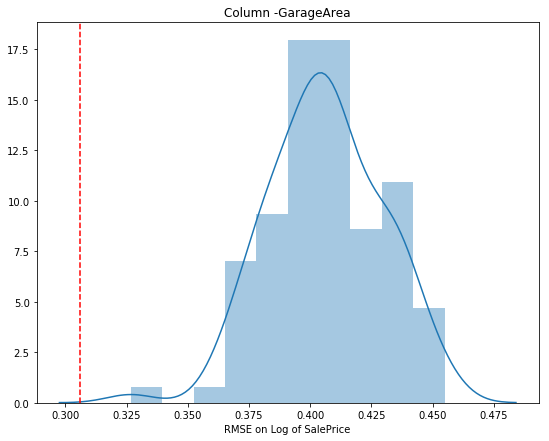

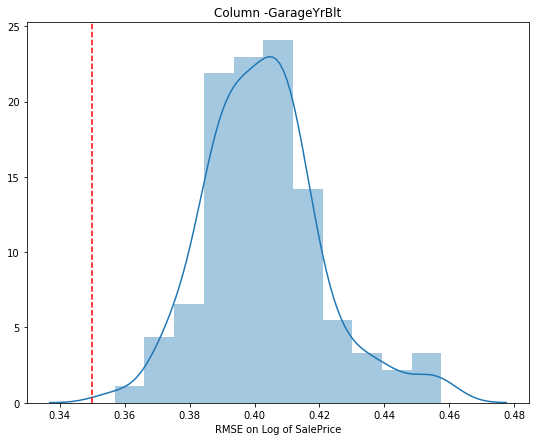

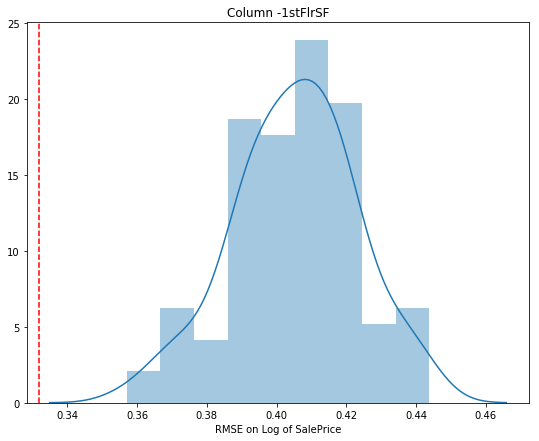

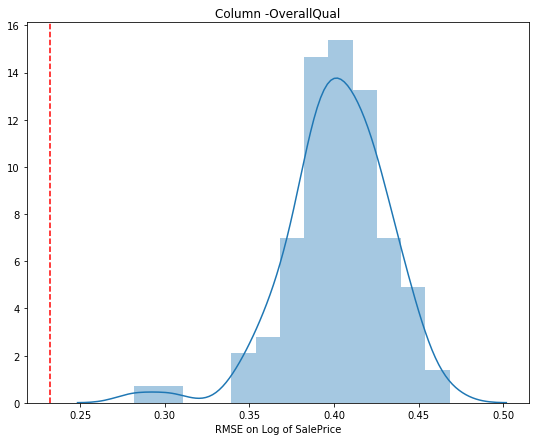

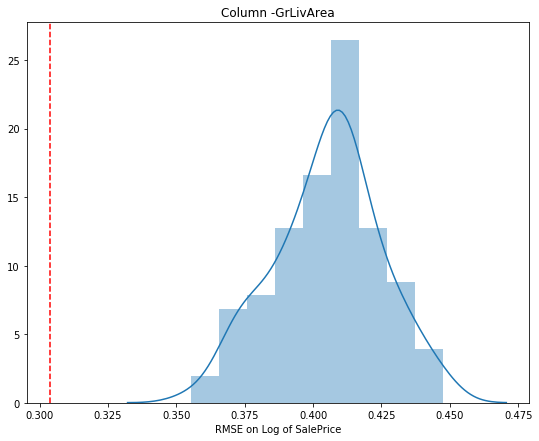

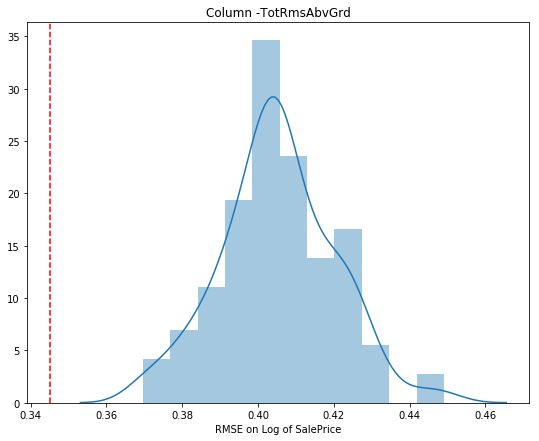

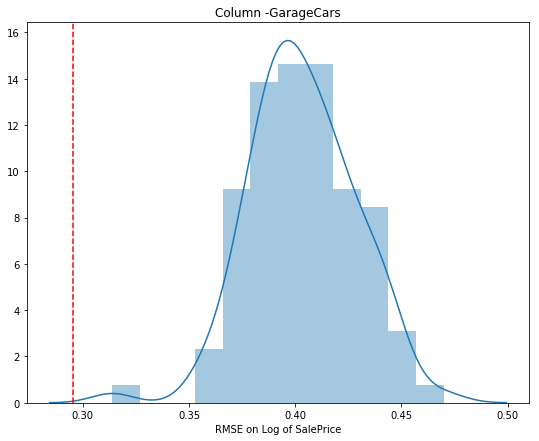

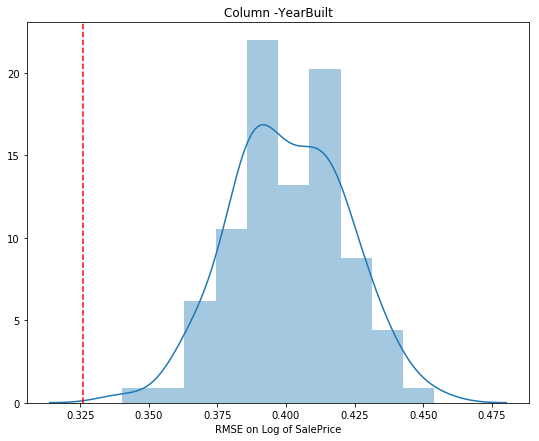

In [301]:
for col in cols:
  fig, ax = plt.subplots()
  fig.set_size_inches(9, 7)

  sns.distplot(a=hm[col], ax=ax)
  ax.axvline(hm_true[col], color='r', linestyle='--')
  plt.title('Column -'+col)
  plt.xlabel("RMSE on Log of SalePrice")

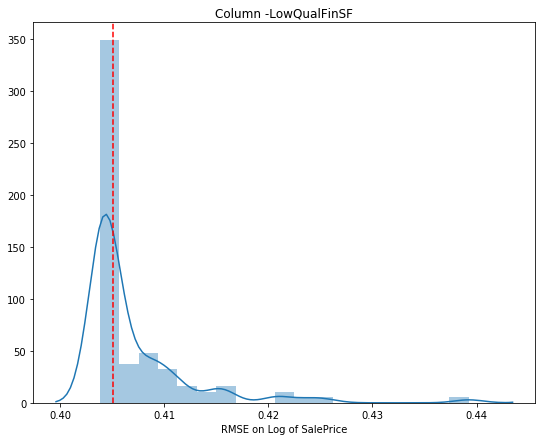

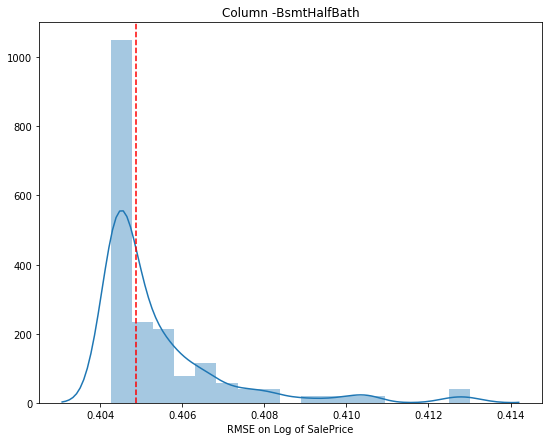

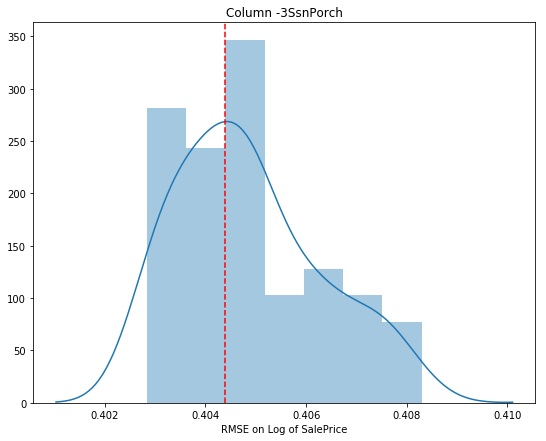

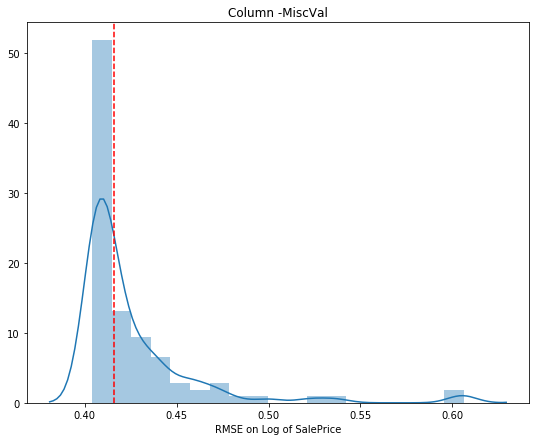

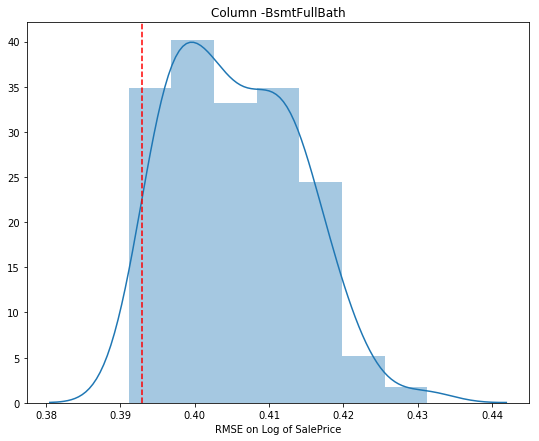

In [302]:
for col in cols_low:
  fig, ax = plt.subplots()
  fig.set_size_inches(9, 7)

  sns.distplot(a=hm[col], ax=ax)
  ax.axvline(hm_true[col], color='r', linestyle='--')
  plt.title('Column -'+col)
  plt.xlabel("RMSE on Log of SalePrice")

In [0]:
all_cols = list(cols)+list(cols_low)

In [0]:
from sklearn.model_selection import permutation_test_score

In [305]:
for col in all_cols:
  X_train, X_test, y_train, y_test = train_test_split(final_train[col], np.log(final_train['SalePrice']), test_size=0.90, random_state=9)
  model = LinearRegression()
  score, permutation_score, pvalue = permutation_test_score(estimator=model, X=X_train.values.reshape(-1, 1), y=y_train, cv=3, n_permutations=100, random_state=9, verbose=0)
  print('Feature name - '+col+' P-value '+str(pvalue))

Feature name - GarageArea P-value 0.009900990099009901
Feature name - GarageYrBlt P-value 0.009900990099009901
Feature name - 1stFlrSF P-value 0.18811881188118812
Feature name - OverallQual P-value 0.009900990099009901
Feature name - GrLivArea P-value 0.009900990099009901
Feature name - TotRmsAbvGrd P-value 0.009900990099009901
Feature name - GarageCars P-value 0.009900990099009901
Feature name - YearBuilt P-value 0.009900990099009901
Feature name - LowQualFinSF P-value 0.39603960396039606
Feature name - BsmtHalfBath P-value 0.9108910891089109
Feature name - 3SsnPorch P-value 0.900990099009901
Feature name - MiscVal P-value 0.8712871287128713
Feature name - BsmtFullBath P-value 0.9405940594059405


#### Observations
From the diagrams above and the p-values above, it's evident enough to conclude
that, for variables, that look random / have tiny relationship with the target 
variable have larger p-values. Eg.   


```
Feature name - LowQualFinSF P-value 0.39603960396039606  
Feature name - BsmtHalfBath P-value 0.9108910891089109    
Feature name - 3SsnPorch P-value 0.900990099009901   
Feature name - MiscVal P-value 0.8712871287128713   
Feature name - BsmtFullBath P-value 0.9405940594059405
```

While the ones which are significant / more closely related to our target variable, have very lower p-values. They also pass the p-test for an alpha value of 0.05 as most of their values are 0.009.   



```
Feature name - OverallQual P-value 0.009900990099009901
Feature name - GrLivArea P-value 0.009900990099009901
Feature name - TotRmsAbvGrd P-value 0.009900990099009901
Feature name - GarageCars P-value 0.009900990099009901
Feature name - YearBuilt P-value 0.009900990099009901
```




### Question 9
Best model

In [0]:
X = final_train.drop(['SalePrice', 'Score'], axis=1)
y = final_train['SalePrice']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, np.log(y), test_size=0.05, random_state=42)

In [0]:
import xgboost as xgb

clfX = xgb.XGBRegressor(n_estimators=100, max_depth=9, verbosity = 3, random_state = 13, learning_rate=0.1, subsample=0.9, colsample_bytree=0.9)
clfX.fit(X_train, y_train, verbose=True)

In [320]:
print(metrics.mean_squared_error(clfX.predict(X_test), y_test))

0.009417507463041368


In [0]:
## Read sample Submission and predict on test
subms = pd.read_csv('My Drive/Colab Notebooks/sample_submission.csv')
subms['SalePrice'] = np.exp(clfX.predict(final_test))
subms.to_csv('My Drive/Colab Notebooks/xgb_pred.csv')

![Final Leadearboard](https://i.imgur.com/n8fY54v.png)

### Question 7
I will use the US GDP Growth Rate data obtained form the World Bank's Site.
The data was obtained from [here](https://data.worldbank.org/indicator/NY.GDP.MKTP.KD.ZG?locations=US)
Plan - to join the GDP growth percentage rate with the `YearSold` attribute in 
our dataset. And to fill the NaN with `ffill` strategy or `average`

In [0]:
## add the data to our final model and check how it does!!
gdp = pd.read_csv('My Drive/Colab Notebooks/us_gdp_growth_rate.csv')

In [0]:
final_train['YrSold'] = train['YrSold']
final_test['YrSold'] = test['YrSold']

In [0]:
gdp.set_index('Year', inplace=True)

In [0]:
def get_gdp_rate(x):
  return gdp.loc[x]

In [0]:
final_train['gdp_growth'] = final_train['YrSold'].apply(get_gdp_rate)
final_test['gdp_growth'] = final_test['YrSold'].apply(get_gdp_rate)

In [0]:
## Scale 'YrSold' variable back! in the train and test set!
scaler = StandardScaler()
scaler.fit(final_train['YrSold'].values.reshape(-1, 1))
final_train['YrSold'] = scaler.transform(final_train['YrSold'].values.reshape(-1, 1))
final_test['YrSold'] = scaler.transform(final_test['YrSold'].values.reshape(-1, 1))

In [0]:
## Build a model!!
X = final_train.drop(['SalePrice', 'Score'], axis=1)
y = final_train['SalePrice']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, np.log(y), test_size=0.05, random_state=42)

In [352]:
import xgboost as xgb

clfX = xgb.XGBRegressor(n_estimators=100, max_depth=9, verbosity = 3, random_state = 13, learning_rate=0.1, subsample=0.9, colsample_bytree=0.9)
clfX.fit(X_train, y_train, verbose=True)

[19:37:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:37:19] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[19:37:19] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[19:37:19] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[19:37:19] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[19:37:19] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[19:37:19] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[19:37:19] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pru

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=9, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=13,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.9, verbosity=3)

In [353]:
print(metrics.mean_squared_error(clfX.predict(X_test), y_test))

0.009650152846928656


In [0]:
subms = pd.read_csv('My Drive/Colab Notebooks/sample_submission.csv')
subms['SalePrice'] = np.exp(clfX.predict(final_test))
subms.to_csv('My Drive/Colab Notebooks/xgb_new_data.csv', index=False)

![Results after adding new Data!!](https://i.imgur.com/zqUfvXl.png)

As per Kaggle's data set, My score improved after adding the US GDP Data! I could jump 152 places up on the LeaderBoard!! 

# Kaggle Profile Details
https://www.kaggle.com/niranjan1995  
Best Rank Public LeaderBoard - 2275  
Best Score 0.13643  

In [0]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

In [0]:
# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [0]:
# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 2
}

In [362]:
print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=500,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

Starting training...
[1]	valid_0's l2: 0.142389	valid_0's l1: 0.316008
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l2: 0.130576	valid_0's l1: 0.302054
[3]	valid_0's l2: 0.118415	valid_0's l1: 0.287378
[4]	valid_0's l2: 0.108494	valid_0's l1: 0.274507
[5]	valid_0's l2: 0.0995226	valid_0's l1: 0.262136
[6]	valid_0's l2: 0.0909927	valid_0's l1: 0.249949
[7]	valid_0's l2: 0.0838077	valid_0's l1: 0.239402
[8]	valid_0's l2: 0.0772875	valid_0's l1: 0.22887
[9]	valid_0's l2: 0.0708007	valid_0's l1: 0.21855
[10]	valid_0's l2: 0.0653905	valid_0's l1: 0.20946
[11]	valid_0's l2: 0.0601348	valid_0's l1: 0.200652
[12]	valid_0's l2: 0.0557914	valid_0's l1: 0.193013
[13]	valid_0's l2: 0.0519378	valid_0's l1: 0.186147
[14]	valid_0's l2: 0.0483283	valid_0's l1: 0.179086
[15]	valid_0's l2: 0.0445971	valid_0's l1: 0.17203
[16]	valid_0's l2: 0.0411316	valid_0's l1: 0.164268
[17]	valid_0's l2: 0.0385694	valid_0's l1: 0.158477
[18]	valid_0's l2: 0.0359908	valid_0's l1: 0.15275


In [364]:
print('Saving model...')
# save model to file
gbm.save_model('My Drive/Colab Notebooks/model.txt')

Saving model...


In [0]:
subms = pd.read_csv('My Drive/Colab Notebooks/sample_submission.csv')
subms['SalePrice'] = np.exp(gbm.predict(final_test))
subms.to_csv('My Drive/Colab Notebooks/gbm.csv', index=False)